# Principal Component Analysis from scratch applied to Wine dataset

The main objective of this Notebook is to implement Principal Component Analysis from scratch using the eigenvectors and eigenvalues method with help of the Numpy library and apply it to Wine dataset. From the obtained Principal Components, we extract the dominant or more important features of the dataset. To conclude, we compare the results from our implementation versus sciklearn builtin method.

## Index
 1. Bibliography & Resources
2. PCA implementation using eigenvectors and eigenvalues.
2. Apply PCA builtin method from sklearn and compare results.

#### Bibliography & Resources

- Goodfellow et al., Deep Learning, Cap. 14.2.
- Baldi, P., & Hornik, K. (1989). Neural Networks and Principal Component Analysis: Learning from Examples Without Local Minima. In Neural Networks (Vol. 2).
- Bao, X., Lucas, J., Sachdeva, S., & Grosse, R. (2021). Regularized linear autoencoders recover the principal components, eventually. http://arxiv.org/abs/2007.06731

## 1. PCA implementation using eigenvectors and eigenvalues

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
wine_dataset = datasets.load_wine()
X = wine_dataset.data

In [3]:
feature_names = wine_dataset.feature_names
print(f"Feature names: {', '.join(feature_names)}")

wine_types = wine_dataset.target_names
print(f"Wine types: {', '.join(wine_types)}")

Feature names: alcohol, malic_acid, ash, alcalinity_of_ash, magnesium, total_phenols, flavanoids, nonflavanoid_phenols, proanthocyanins, color_intensity, hue, od280/od315_of_diluted_wines, proline
Wine types: class_0, class_1, class_2


In [4]:
n, m = X.shape
print(f"Samples: {n}", f"Features: {m}")

Samples: 178 Features: 13


In [5]:
data = StandardScaler().fit_transform(X)
C_x = np.cov(data, rowvar=False)

In [6]:
eigvals, eigvecs = np.linalg.eig(C_x)
print(f"Eigenvalues: {eigvals}")
pd.DataFrame(data=eigvecs, columns=feature_names)

Eigenvalues: [4.73243698 2.51108093 1.45424187 0.92416587 0.85804868 0.64528221
 0.55414147 0.10396199 0.35046627 0.16972374 0.29051203 0.22706428
 0.25232001]


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,-0.144329,0.483652,-0.207383,0.017856,-0.265664,0.213539,0.056396,-0.014970,0.396139,-0.266286,-0.508619,-0.225917,0.211605
1,0.245188,0.224931,0.089013,-0.536890,0.035214,0.536814,-0.420524,-0.025964,0.065827,0.121696,0.075283,0.076486,-0.309080
2,0.002051,0.316069,0.626224,0.214176,-0.143025,0.154475,0.149171,0.141218,-0.170260,-0.049622,0.307694,-0.498691,-0.027125
3,0.239320,-0.010591,0.612080,-0.060859,0.066103,-0.100825,0.286969,-0.091683,0.427970,-0.055743,-0.200449,0.479314,0.052799
4,-0.141992,0.299634,0.130757,0.351797,0.727049,0.038144,-0.322883,-0.056774,-0.156361,0.062220,-0.271403,0.071289,0.067870
5,-0.394661,0.065040,0.146179,-0.198068,-0.149318,-0.084122,0.027925,0.463908,-0.405934,-0.303882,-0.286035,0.304341,-0.320131
6,-0.422934,-0.003360,0.150682,-0.152295,-0.109026,-0.018920,0.060685,-0.832257,-0.187245,-0.042899,-0.049578,-0.025694,-0.163151
7,0.298533,0.028779,0.170368,0.203301,-0.500703,-0.258594,-0.595447,-0.114040,-0.233285,0.042352,-0.195501,0.116896,0.215535
8,-0.313429,0.039302,0.149454,-0.399057,0.136860,-0.533795,-0.372139,0.116917,0.368227,-0.095553,0.209145,-0.237363,0.134184
9,0.088617,0.529996,-0.137306,-0.065926,-0.076437,-0.418644,0.227712,0.011993,-0.033797,0.604222,-0.056218,0.031839,-0.290775


In [7]:
indices = np.argsort(-eigvals)
print(f"Order indices: {indices}")

Order indices: [ 0  1  2  3  4  5  6  8 10 12 11  9  7]


In [8]:
eigvals = eigvals[indices]
eigvecs = eigvecs[:, indices]

In [9]:
PCs = data @ eigvecs

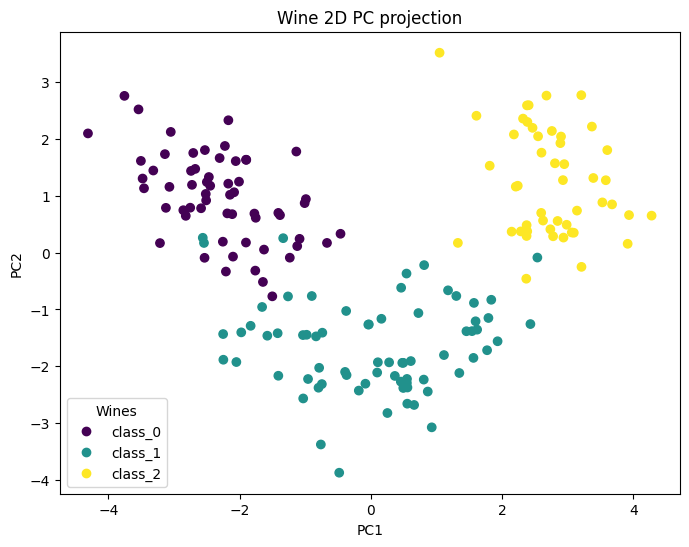

In [10]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(x=PCs[:,0], y=PCs[:,1], c=wine_dataset.target)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Wine 2D PC projection")
handles, _ = scatter.legend_elements()
plt.legend(handles, wine_dataset.target_names, title="Wines")
plt.show()

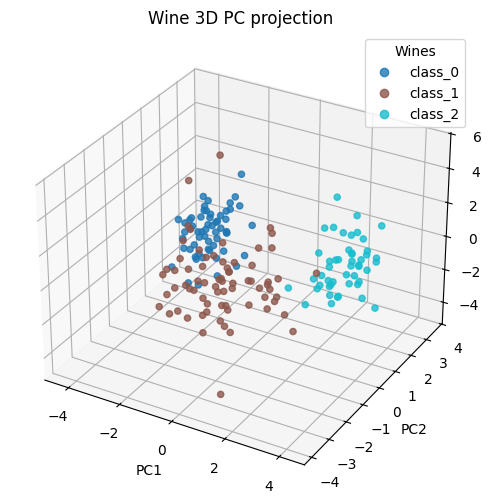

In [11]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    PCs[:, 0], PCs[:, 1], PCs[:, 2],
    c=wine_dataset.target,
    cmap='tab10',
    alpha=0.8
)

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("Wine 3D PC projection")

handles, _ = scatter.legend_elements()
ax.legend(handles, wine_dataset.target_names, title="Wines")

plt.show()


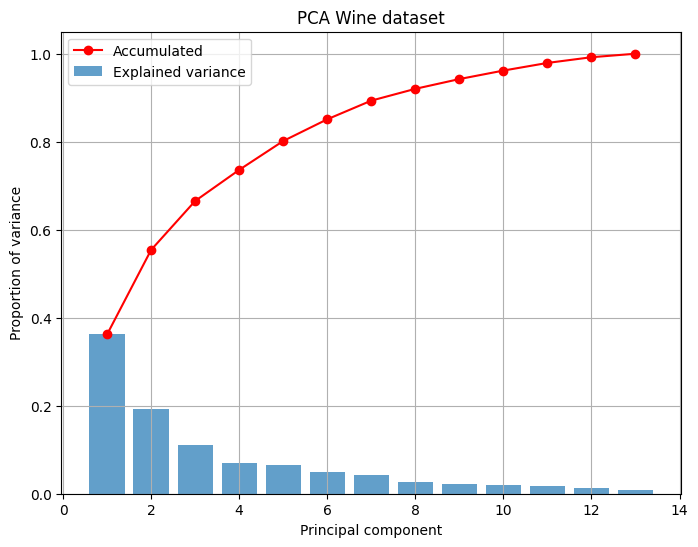

In [12]:
explained_var = eigvals / eigvals.sum()
cum_explained_var = np.cumsum(explained_var)

plt.figure(figsize=(8, 6))
plt.bar(range(1, len(eigvals)+1), explained_var, alpha=0.7, label="Explained variance")
plt.plot(range(1, len(eigvals)+1), cum_explained_var, marker="o", color="red", label="Accumulated")

plt.xlabel("Principal component")
plt.ylabel("Proportion of variance")
plt.title("PCA Wine dataset")
plt.legend()
plt.grid(True)
plt.show()

The three first PCs captures around 65% of the variance.

## 2. Apply PCA builtin method from sklearn and compare results.